# Libraries Download & Import

In [ ]:
!pip install whatthelang
!pip install swifter
!pip install nlu pyspark==3.0.1
!pip install matplotlib
!pip install WordCloud
!pip install fbprophet

     |████████████████████████████████| 788kB 7.6MB/s 
     |████████████████████████████████| 460kB 25.5MB/s 
     |████████████████████████████████| 245kB 25.9MB/s 
  Created wheel for whatthelang: filename=whatthelang-1.0.1-cp37-none-any.whl size=789821 sha256=d8c3c04d9846599de857c809dfdcdfc094bba477074affc25a9b5b6167d177e4
  Stored in directory: /root/.cache/pip/wheels/54/ec/de/379ea04fcc427c46fe3ecd21a5041875fcb41bbd81062abba5
  Created wheel for cysignals: filename=cysignals-1.10.3-cp37-cp37m-linux_x86_64.whl size=706057 sha256=b2bef1ec103e7ce3a94fce23987ab9ab110e2b8ae6a7c155d42baedc58d21108
  Stored in directory: /root/.cache/pip/wheels/1d/de/c9/22c3a5adc6ff0dd19904d4cab0677410e53f4fdd42188ae123
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp37-cp37m-linux_x86_64.whl size=1461258 sha256=c814707464a36e792d09893fad4fbc6f27214239274f543e94430cd2ea0d59f9
  Stored in directory: /root/.cache/pip/wheels/25/de/c6/3d26a304c069689a7bf5ef2cc774588663700c8381dbf3d947
Successful

     |████████████████████████████████| 430kB 8.7MB/s 
     |████████████████████████████████| 204.2MB 65kB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 204kB 52.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=5eea10f3f4661f7099ce2a3a6f9310864e15a0991ee7642a39286eddf6472275
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:
import zipfile
import pandas as pd
from whatthelang import WhatTheLang
import nltk
import re
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
#from dask import dataframe as dd
#from google.colab import files
#import hickle
import nltk
nltk.download('stopwords')
import swifter
import nlu
import numpy as np
#from fprophet import Prophet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data loading and manipulation

Data sources:
* Tweets: https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329
* Bitcoin prices: https://www.cryptodatadownload.com/data/binance/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Poner el Path aca
#El dataset tiene que ir en una subcarpeta /Datasets/
#
#Path = '~/Documents/' #Linux Fede
Path = '/content/drive/MyDrive/Colab Notebooks/' #Collab Fede
#Path = 'C:/Users/Federico Windows/Dropbox/Curso DS 2021/Proyecto Final/Proyecto/' #Windows Fede
#Path =

El dataset es del 16 millones, cargo las primeras filas para analizar

In [ ]:
%%time
path = Path + 'Datasets/my_clean_tweets2_6Mrows.csv.xz'
df = pd.read_csv(path, sep=';', compression='xz', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   date       datetime64[ns]
 1   text       object        
 2   sentiment  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 137.3+ MB
CPU times: user 19.9 s, sys: 719 ms, total: 20.6 s
Wall time: 20.7 s


In [ ]:
df.head(100)

,date,text,sentiment
0,2017-01-01,www coindesk com price bitcoin month summary,0.000000
1,2017-01-01,bitcoin ahora usd eur mxn bitso mxn volabit mx...,0.000000
2,2017-01-01,kobo btc usd ngn zar kes kobocoin pic twitter ...,0.000000
3,2017-01-01,utc h range volume btc,0.000000
4,2017-01-01,invest one time btc earn btc one month bitcoin...,0.000000
...,...,...,...
95,2017-01-01,www coindesk com price bitcoin week summary,0.000000
96,2017-01-01,bitfinex bitstamp gdax btce itbit kraken bitco...,0.000000
97,2017-01-01,bitcoin bit btc,0.000000
98,2017-01-01,hamradiocoin ham btc,0.000000


In [ ]:
#No se ejecuta ahora. Es la funcion que usamos para limpiar los tweets de caracteres que no queremos
def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    text = ' '.join(text.split('.'))
    text = re.sub('\/',' ',text)
    text = text.strip('\'"')
    text = re.sub(r'@([^\s]+)',r'\1',text)
    text = re.sub(r'\\',' ',text)
    text = text.lower()
    text = re.sub('[\s]+', ' ', text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    text = re.sub(r'((http)\S+)','',text)
    text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
    text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
    text = [word for word in text.split() if word not in forbidden_words]
    return ' '.join(text)

In [ ]:
df = df.dropna(how='all')
df = df.drop(['sentiment'],axis = 1)
df['text'] = df['text'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000000 entries, 0 to 5999999
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   text    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 137.3+ MB


## Sentiment with TextBlob library

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
%%time
def Subjetividad(twt):
    """Subjectivity from TextBlob library."""
    return TextBlob(twt).subjectivity

def Polaridad(twt):
    """Polarity from TextBlob library."""
    return TextBlob(twt).polarity

df['subjectivity'] = df['text'].swifter.allow_dask_on_strings(enable=True).apply(Subjetividad)
df['polarity'] = df['text'].swifter.allow_dask_on_strings(enable=True).apply(Polaridad)
df.head()


CPU times: user 1min 27s, sys: 11 s, total: 1min 39s
Wall time: 36min 4s


In [ ]:
%%time
def Sentiment(score):
    """Sentiment category."""
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['sentiment'] = df['polarity'].swifter.allow_dask_on_strings(enable=True).apply(Sentiment)
df.head()


CPU times: user 986 ms, sys: 609 ms, total: 1.6 s
Wall time: 13.7 s


In [ ]:
df.to_csv(Path + 'Datasets/my_clean_tweets2_6Mrows_procesado.csv.xz',
          compression='xz', sep=';', encoding='utf-8')

In [ ]:
%%time
df = pd.read_csv(Path + 'Datasets/my_clean_tweets2_6Mrows_procesado.csv.xz',
                 sep=';', compression='xz', parse_dates=['date'], index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Unnamed: 0    int64         
 1   date          datetime64[ns]
 2   text          object        
 3   subjectivity  float64       
 4   polarity      float64       
 5   sentiment     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 274.7+ MB
CPU times: user 26.3 s, sys: 3.11 s, total: 29.4 s
Wall time: 28.9 s


In [ ]:
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

,date,text,subjectivity,polarity,sentiment
0,2017-01-01,www coindesk com price bitcoin month summary,0.0,0.0,Neutral
1,2017-01-01,bitcoin ahora usd eur mxn bitso mxn volabit mx...,0.0,0.0,Neutral
2,2017-01-01,kobo btc usd ngn zar kes kobocoin pic twitter ...,0.0,0.0,Neutral
3,2017-01-01,utc h range volume btc,0.0,0.0,Neutral
4,2017-01-01,invest one time btc earn btc one month bitcoin...,0.0,0.0,Neutral


# Plots

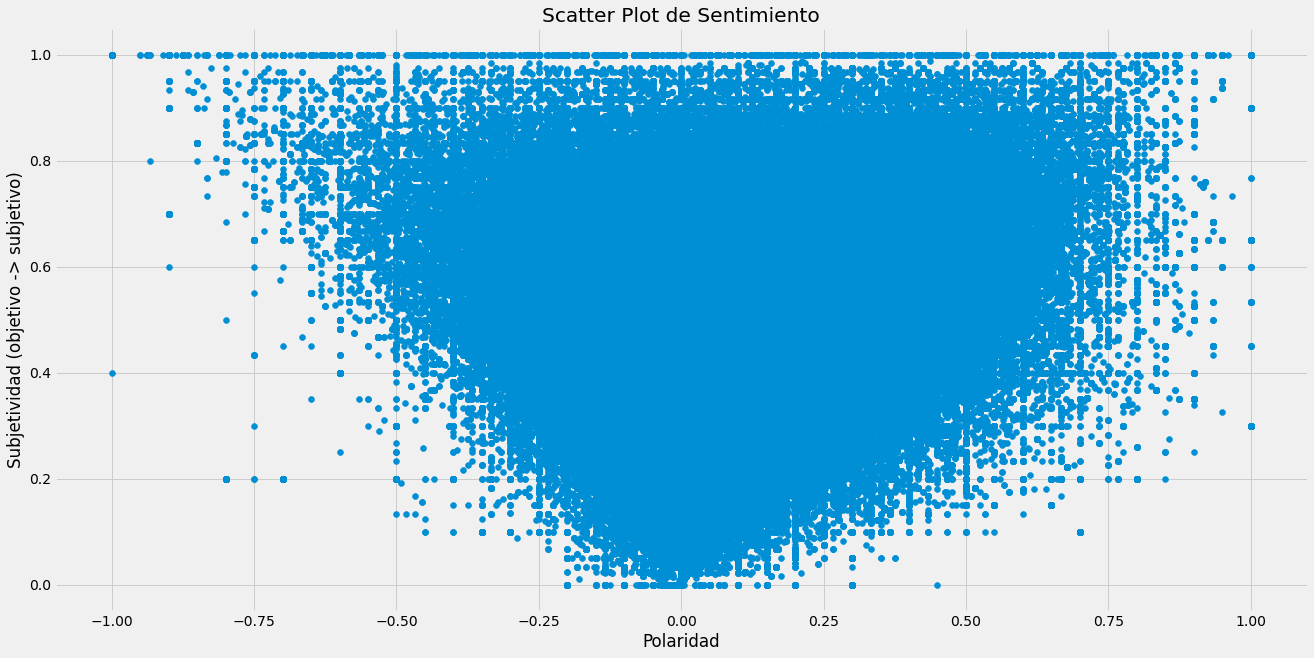

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Scatter Plot de Sentimiento')
plt.xlabel('Polaridad')
plt.ylabel('Subjetividad (objetivo -> subjetivo)')
plt.scatter(df['polarity'], df['subjectivity'])
plt.show()

Text(0, 0.5, 'Numero de tweets')

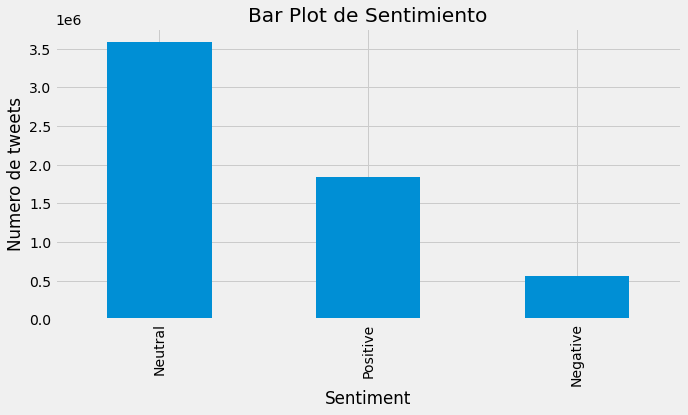

In [ ]:
plt.figure(figsize=(10,5))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Bar Plot de Sentimiento')
plt.xlabel('Sentiment')
plt.ylabel('Numero de tweets')

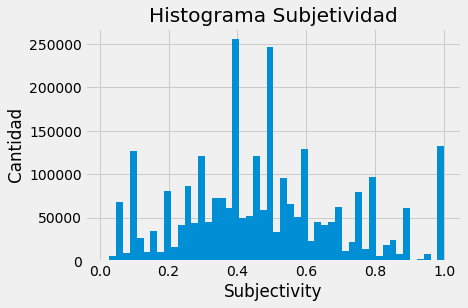

In [ ]:
plt.title('Histograma Subjetividad')
plt.xlabel('Subjectivity')
plt.ylabel('Cantidad')
plt.hist(df['subjectivity'][df['subjectivity'] > 0], bins=50)
plt.show()

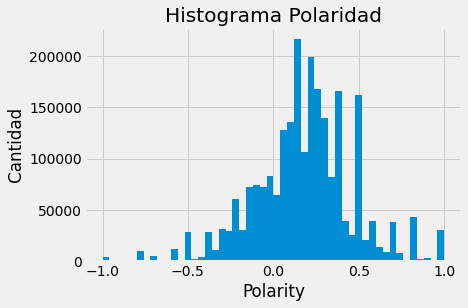

In [ ]:
plt.title('Histograma Polaridad')
plt.xlabel('Polarity')
plt.ylabel('Cantidad')
plt.hist(df['polarity'][df['polarity'] != 0], bins=50)
plt.show()

## Time Series Plot

In [ ]:
test = df.groupby(by="date").mean()
test.head()

,subjectivity,polarity
date,,
2017-01-01,0.085064,0.032313
2017-01-02,0.087150,0.025686
2017-01-03,0.079158,0.029962
2017-01-04,0.088688,0.021112
2017-01-05,0.094335,0.016679


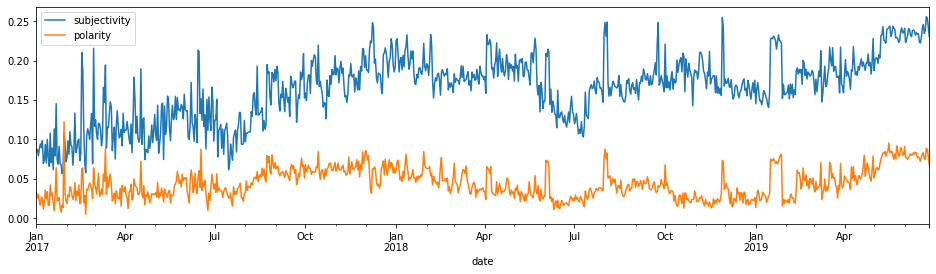

In [ ]:
test.plot(figsize=(16,4))
plt.show()

In [ ]:
test_rolling = test.rolling(10).mean()

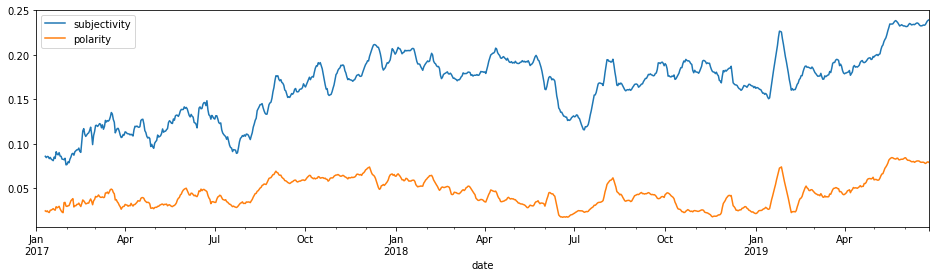

In [ ]:
test_rolling.plot(figsize=(16,4))
plt.show()

# Wordcloud

Agregar top 10 palabras mas positivas y negativas
Agregar top 10 palabras Polares


In [ ]:
wordcloud_text = ' '.join(df['text'].tolist())

TypeError: sequence item 9746: expected str instance, float found

In [ ]:
df[9745:]

,date,text,subjectivity,polarity,sentiment,contains_int
9745,2017-01-28,zaifexchange btc jpy xem jpy mona jpy,0.000000,0.000000,Neutral,False
9746,2017-01-28,NaN,0.000000,0.000000,Neutral,False
9747,2017-01-28,btc bitcoinprice average price bitcoin across ...,0.400000,-0.150000,Negative,False
9748,2017-01-28,btc bitcoin quotes bitstamp btce coinbase,0.000000,0.000000,Neutral,False
9749,2017-01-28,jan utc bitcoin blockchain status last h block...,0.066667,0.000000,Neutral,False
...,...,...,...,...,...,...
5999995,2019-06-26,bitcoin become crazy winners losers btc price ...,0.550000,-0.400000,Negative,False
5999996,2019-06-26,willwork btc cryptomaestro still bought btc ma...,0.267857,0.142857,Positive,False
5999997,2019-06-26,sanad kadib bitcoin oo gaaray meshii dec maant...,0.000000,0.000000,Neutral,False
5999998,2019-06-26,ironman alts get rekt since inception beaten b...,0.666667,0.533333,Positive,False


In [ ]:
wordcloud_text = ' '.join(map(str, df['text']))

In [ ]:
def contains_int(text):
    return isinstance(text, int)#

#df['contains_int'] = df['text'].swifter.allow_dask_on_strings(enable=True).apply(contains_int)
#df['contains_int'].value_counts()

Dask Apply:   0%|          | 0/8 [00:00<?, ?it/s]

,date,text,subjectivity,polarity,sentiment,contains_int
0,2017-01-01,www coindesk com price bitcoin month summary,0.0,0.0,Neutral,False
1,2017-01-01,bitcoin ahora usd eur mxn bitso mxn volabit mx...,0.0,0.0,Neutral,False
2,2017-01-01,kobo btc usd ngn zar kes kobocoin pic twitter ...,0.0,0.0,Neutral,False
3,2017-01-01,utc h range volume btc,0.0,0.0,Neutral,False
4,2017-01-01,invest one time btc earn btc one month bitcoin...,0.0,0.0,Neutral,False


In [ ]:
df[9745:]

,date,text,subjectivity,polarity,sentiment,contains_int
9745,2017-01-28,zaifexchange btc jpy xem jpy mona jpy,0.000000,0.000000,Neutral,False
9746,2017-01-28,NaN,0.000000,0.000000,Neutral,False
9747,2017-01-28,btc bitcoinprice average price bitcoin across ...,0.400000,-0.150000,Negative,False
9748,2017-01-28,btc bitcoin quotes bitstamp btce coinbase,0.000000,0.000000,Neutral,False
9749,2017-01-28,jan utc bitcoin blockchain status last h block...,0.066667,0.000000,Neutral,False
...,...,...,...,...,...,...
5999995,2019-06-26,bitcoin become crazy winners losers btc price ...,0.550000,-0.400000,Negative,False
5999996,2019-06-26,willwork btc cryptomaestro still bought btc ma...,0.267857,0.142857,Positive,False
5999997,2019-06-26,sanad kadib bitcoin oo gaaray meshii dec maant...,0.000000,0.000000,Neutral,False
5999998,2019-06-26,ironman alts get rekt since inception beaten b...,0.666667,0.533333,Positive,False


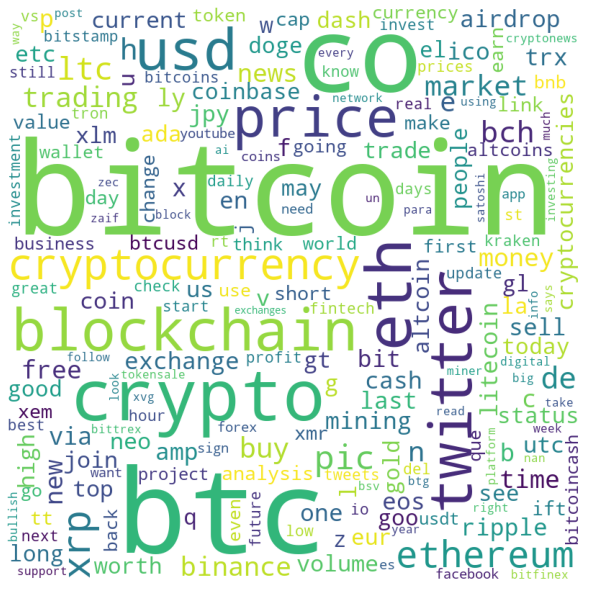

In [ ]:
my_stopwords = list(STOPWORDS)
wordcloud = WordCloud(width=800, height=800,
                      background_color='white', 
                      stopwords=my_stopwords,  #remueve articulos comunes (a, an, it, etc...)
                      collocations=False,  #remueve bigramas (2 palabras)
                      normalize_plurals=False,
                      max_words=200,
                      min_font_size=10).generate(wordcloud_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# 10 most positive tweets
most_positive = df.sort_values(by='polarity', ascending=False)['text'].head(10)
for i in range(len(most_positive)):
    print(most_positive.iloc[i])
    print('-' * 50)

co iqdmuwrig investments city investment supreme returns provide best forex managed accounts bet life fx stocks bitcoin bestforex experts dubai uae london investment funds forex retwit inte
--------------------------------------------------
perfect
--------------------------------------------------
rickross also perfect day boss buy bitcoin co kq n uaan
--------------------------------------------------
bitcoin longest chain one greatest cumulative difficulty valid chain means chain cumulative difficulty term proof work blocks transactions valid blockchain btc
--------------------------------------------------
bitmex bitcoin best co gnwv gwwm bot bot return co msymfthfrc algorithmic trading cryptocurrency strategy automated
--------------------------------------------------
tras el best seller de su libro cnicas de seguimiento manuel bit ly qsr cybersecurity bitcoin pic twitter com rjporyyad
--------------------------------------------------
best e currency exchanger exchange money exc

In [ ]:
# 10 most Negative tweets
most_negative = df.sort_values(by='polarity', ascending=True)['text'].head(10)
for i in range(len(most_negative)):
    print(most_negative.iloc[i])
    print('-' * 50)

josh rager crypto instagram worst bitcoin miners amp binary traders
--------------------------------------------------
remember insane bull market comes year btc ing gonna chop around
--------------------------------------------------
sounds like terrible idea
--------------------------------------------------
nsa terrifying bitcoin ransomware leaves baltimore begging help co rhury dfw
--------------------------------------------------
bleak horizons bitcoin price headings towards goo gl grtwrq pic twitter com u ifz abdw
--------------------------------------------------
india insane anti crypto bill proposes yr prison bitcoin adopters report co r ec rgk z
--------------------------------------------------
lt p gt outrageous bet crypto today prices line ethereum co founder lt p gt lt p gt post lt rel nofollow href co acnobxcqen
--------------------------------------------------
whenever hear called blockchain experts sales people speak surprises awful explaining utility could utility l

In [ ]:
%%time
path = Path + 'Datasets/Binance_BTCUSDT_d.csv'
df2 = pd.read_csv(path, parse_dates=['date'], header=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   unix         1381 non-null   float64       
 1   date         1381 non-null   datetime64[ns]
 2   symbol       1381 non-null   object        
 3   open         1381 non-null   float64       
 4   high         1381 non-null   float64       
 5   low          1381 non-null   float64       
 6   close        1381 non-null   float64       
 7   Volume BTC   1381 non-null   float64       
 8   Volume USDT  1381 non-null   float64       
 9   tradecount   1257 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 108.0+ KB
CPU times: user 16.3 ms, sys: 1.94 ms, total: 18.2 ms
Wall time: 594 ms


In [ ]:
df2.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.622074e+12,2021-05-27,BTC/USDT,39241.92,39243.10,39072.00,39105.47,328.737300,1.286808e+07,7097.0
1,1.621987e+12,2021-05-26,BTC/USDT,38324.72,40841.00,37800.44,39241.91,104780.773396,4.113718e+09,2432319.0
2,1.621901e+12,2021-05-25,BTC/USDT,38810.99,39791.77,36419.62,38324.72,111996.228404,4.253520e+09,2508310.0
3,1.621814e+12,2021-05-24,BTC/USDT,34681.44,39920.00,34031.00,38796.29,161630.893971,5.996773e+09,3510578.0
4,1.621728e+12,2021-05-23,BTC/USDT,37458.51,38270.64,31111.01,34655.25,217136.046593,7.431242e+09,4082004.0


In [ ]:
df2['adjusted_price'] = 100 * np.log(df2['close']/df2['close'].shift())  # 100 * np.log(df_log[col] / df_log[col].shift())
df2.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,adjusted_price
0,1.622074e+12,2021-05-27,BTC/USDT,39241.92,39243.10,39072.00,39105.47,328.737300,1.286808e+07,7097.0,NaN
1,1.621987e+12,2021-05-26,BTC/USDT,38324.72,40841.00,37800.44,39241.91,104780.773396,4.113718e+09,2432319.0,0.348295
2,1.621901e+12,2021-05-25,BTC/USDT,38810.99,39791.77,36419.62,38324.72,111996.228404,4.253520e+09,2508310.0,-2.365019
3,1.621814e+12,2021-05-24,BTC/USDT,34681.44,39920.00,34031.00,38796.29,161630.893971,5.996773e+09,3510578.0,1.222950
4,1.621728e+12,2021-05-23,BTC/USDT,37458.51,38270.64,31111.01,34655.25,217136.046593,7.431242e+09,4082004.0,-11.287539


In [ ]:
price_bydate = df2.groupby(by="date").mean()
price_bydate = price_bydate.drop(['unix','open','high','low','Volume BTC','Volume USDT','tradecount','adjusted_price'],axis = 1)
price_bydate.head()

,close
date,
2017-08-17,4285.08
2017-08-18,4108.37
2017-08-19,4139.98
2017-08-20,4086.29
2017-08-21,4016.00


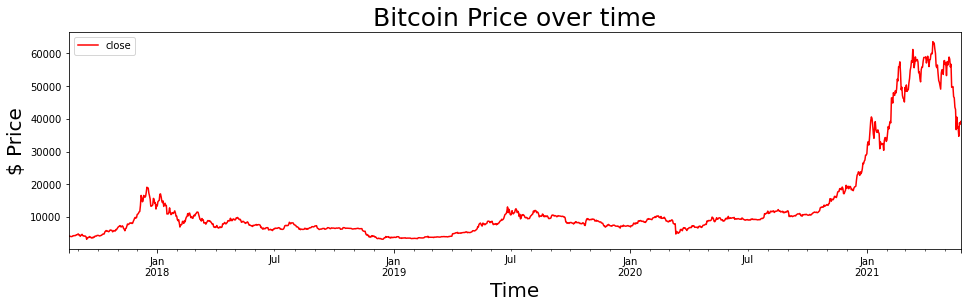

In [ ]:
price_bydate.plot(figsize=(16,4), color='r')
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20);
plt.show()

In [ ]:
adjustedprice_bydate = df2.groupby(by="date").mean()
adjustedprice_bydate = adjustedprice_bydate.drop(['unix','open','high','low','close','Volume BTC','Volume USDT','tradecount'],axis = 1)
adjustedprice_bydate.head()

,adjusted_price
date,
2017-08-17,4.211287
2017-08-18,-0.766460
2017-08-19,1.305349
2017-08-20,1.735109
2017-08-21,-0.595831


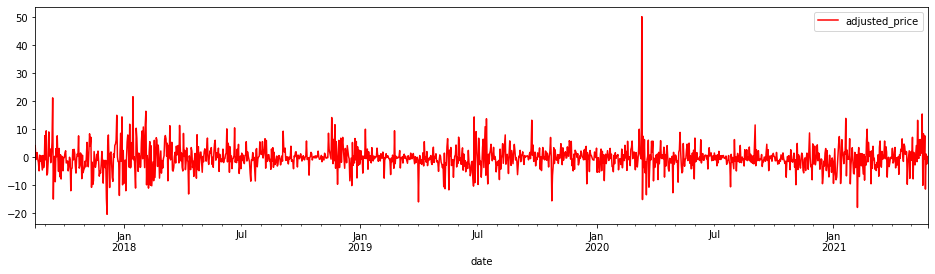

In [ ]:
adjustedprice_bydate.plot(figsize=(16,4), color='r')
plt.show()

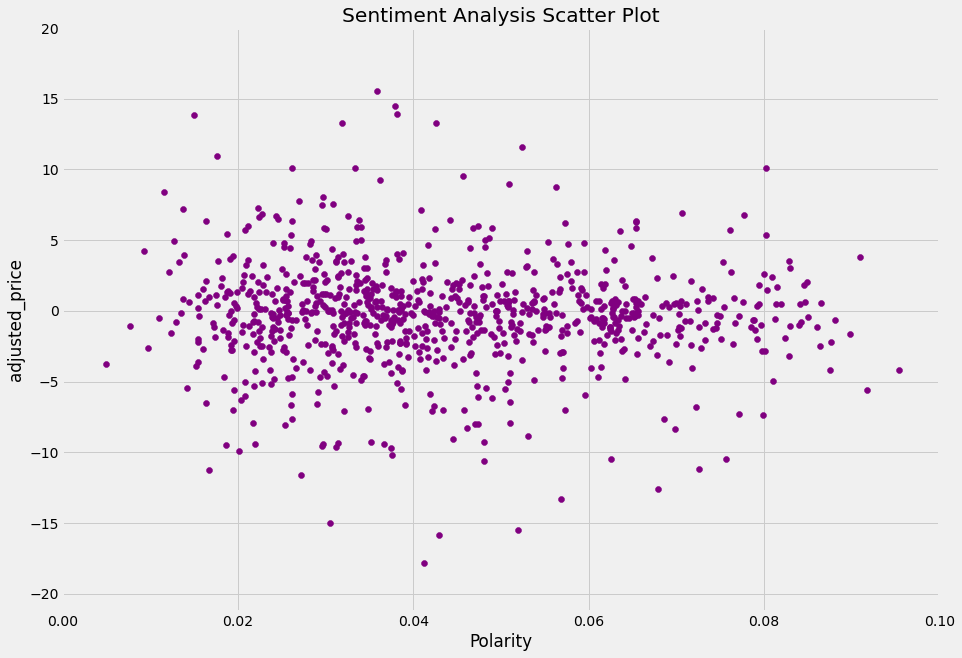

In [ ]:
# create a scatter plot to show the polarity and percentage change

plt.figure(figsize=(14,10))

for i in range(0, 890):
    plt.scatter(test["polarity"].iloc[[i]].values[0], df2["adjusted_price"].iloc[[i]].values[0], color="Purple")
    
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('Polarity')
plt.ylabel('adjusted_price')
plt.xlim(0,0.1)
plt.ylim(top=20)
plt.show()

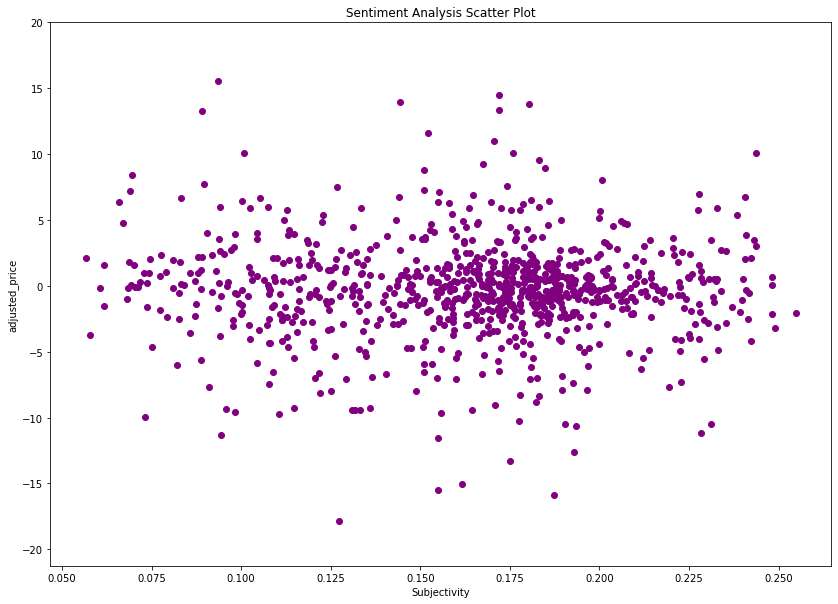

In [ ]:
# create a scatter plot to show the subjectivity and percentage change

plt.figure(figsize=(14,10))

for i in range(0, 890):
    plt.scatter(test["subjectivity"].iloc[[i]].values[0], df2["adjusted_price"].iloc[[i]].values[0], color="Purple")
    
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('Subjectivity')
plt.ylabel('adjusted_price')
plt.ylim(top=20)
plt.show()

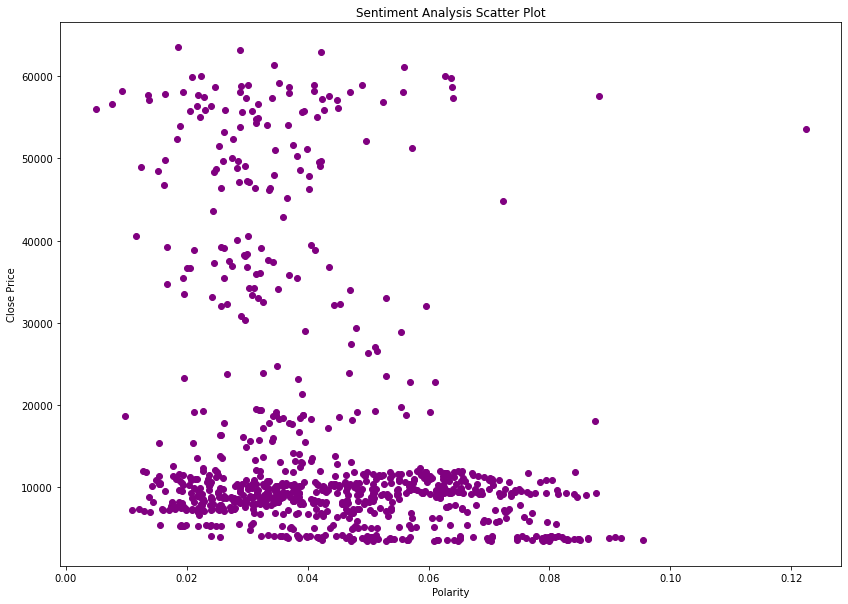

In [ ]:
 #create a scatter plot to show the polarity and close price (not adjusted)

plt.figure(figsize=(14,10))

for i in range(0, 890):
    plt.scatter(test["polarity"].iloc[[i]].values[0], df2["close"].iloc[[i]].values[0], color="Purple")
    
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('Polarity')
plt.ylabel('Close Price')
#plt.xlim(0,0.1)
#plt.ylim(top=20)
plt.show()

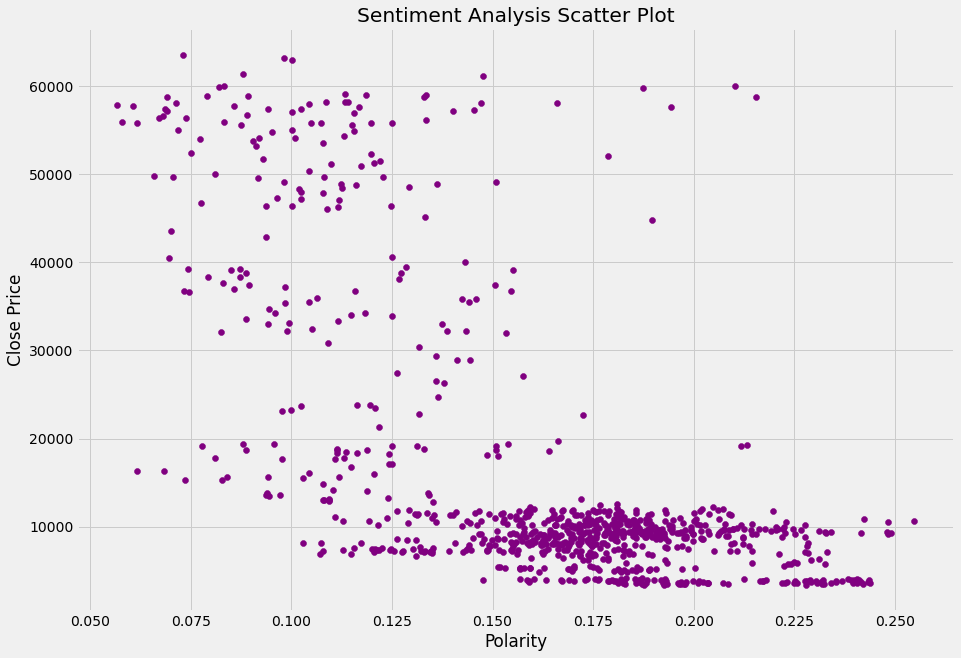

In [ ]:
 #create a scatter plot to show the polarity and close price (not adjusted)

plt.figure(figsize=(14,10))

for i in range(0, 890):
    plt.scatter(test["subjectivity"].iloc[[i]].values[0], df2["close"].iloc[[i]].values[0], color="Purple")
    
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('Polarity')
plt.ylabel('Close Price')
#plt.xlim(0,0.1)
#plt.ylim(top=20)
plt.show()

In [ ]:
#armamos la funcion para seleccionar las filas donde los precios aumentaron mas de 10 o menos de -10 (shock price)

def price_shock(price):
    """Categorical variable if price change
    is Bigger that |10|."""
    if price > 5 or price < -5:
        return 'shock' 
    else: 
        return 'norm'
    
df2['price_shock'] = df2['adjusted_price'].apply(price_shock)
df2.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,adjusted_price,price_shock
0,1.622074e+12,2021-05-27,BTC/USDT,39241.92,39243.10,39072.00,39105.47,328.737300,1.286808e+07,7097.0,NaN,norm
1,1.621987e+12,2021-05-26,BTC/USDT,38324.72,40841.00,37800.44,39241.91,104780.773396,4.113718e+09,2432319.0,0.348295,norm
2,1.621901e+12,2021-05-25,BTC/USDT,38810.99,39791.77,36419.62,38324.72,111996.228404,4.253520e+09,2508310.0,-2.365019,norm
3,1.621814e+12,2021-05-24,BTC/USDT,34681.44,39920.00,34031.00,38796.29,161630.893971,5.996773e+09,3510578.0,1.222950,norm
4,1.621728e+12,2021-05-23,BTC/USDT,37458.51,38270.64,31111.01,34655.25,217136.046593,7.431242e+09,4082004.0,-11.287539,shock


In [ ]:
#filtramos filas por shock de precio ajustado, para ver las fechas
df_variaciones=df2.loc[(df2.price_shock == 'shock'),['date','adjusted_price']]
df_variaciones.head(50)

,date,adjusted_price
4,2021-05-23,-11.287539
5,2021-05-22,7.755027
7,2021-05-20,8.425363
8,2021-05-19,-9.945284
9,2021-05-18,15.519382
11,2021-05-16,6.434307
13,2021-05-14,6.375489
16,2021-05-11,13.262324
23,2021-05-04,-7.661462
24,2021-05-03,7.196003


# Forecasting methods for Bitcoin prices
Sentiment is not a major driver, beyond standard levels
We see major impacts on break news, such a Elon Musk tweet anouncing a huge purchase or huge sell, halving day, BTC exchange shut down and so on. Some milestone events with great impact.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
#we establish cut date for analysis and training
split_date = df2['date'] == "2021-01-31" 
data_train = df2.loc[df2['date'] <= pd.to_datetime("2021-01-31")]
data_test = df2.loc[df2['date'] > pd.to_datetime('2021-01-31')]
data_train

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,adjusted_price,price_shock
116,1.612051e+12,2021-01-31,BTC/USDT,34262.89,34342.69,32171.67,33092.98,68742.280384,2.289641e+09,1707064.0,-1.301112,norm
117,1.611965e+12,2021-01-30,BTC/USDT,34246.28,34933.00,32825.00,34262.88,84889.681340,2.884500e+09,2201040.0,3.474138,norm
118,1.611878e+12,2021-01-29,BTC/USDT,33368.18,38531.90,31915.40,34252.20,231827.005626,8.195593e+09,4403349.0,-0.031176,norm
119,1.611792e+12,2021-01-28,BTC/USDT,30362.19,33783.98,29842.10,33364.86,92621.145617,2.953553e+09,2060660.0,-2.624755,norm
120,1.611706e+12,2021-01-27,BTC/USDT,32464.01,32557.29,29241.72,30366.15,95911.961711,2.958081e+09,2065953.0,-9.417475,shock
...,...,...,...,...,...,...,...,...,...,...,...,...
1376,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.120000,2.770592e+06,NaN,-0.595831,norm
1377,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.540000,1.915636e+06,NaN,1.735109,norm
1378,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.150000,1.508239e+06,NaN,1.305349,norm
1379,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.070000,4.994494e+06,NaN,-0.766460,norm


In [ ]:
data_test

,date,Test Set
0,2021-05-27,39105.47
1,2021-05-26,39241.91
2,2021-05-25,38324.72
3,2021-05-24,38796.29
4,2021-05-23,34655.25
...,...,...
111,2021-02-05,38290.24
112,2021-02-04,36936.66
113,2021-02-03,37618.87
114,2021-02-02,35466.24


In [ ]:
data_train = data_train.drop(['unix','symbol','open','high','low','Volume BTC','Volume USDT','tradecount','adjusted_price','price_shock'], axis=1)
data_train.head()

,date,close
116,2021-01-31,33092.98
117,2021-01-30,34262.88
118,2021-01-29,34252.20
119,2021-01-28,33364.86
120,2021-01-27,30366.15


In [ ]:
data_test = data_test.drop(['unix','symbol','open','high','low','Volume BTC','Volume USDT','tradecount','adjusted_price','price_shock'], axis=1)
data_test.head()

,date,close
0,2021-05-27,39105.47
1,2021-05-26,39241.91
2,2021-05-25,38324.72
3,2021-05-24,38796.29
4,2021-05-23,34655.25


In [ ]:
#Rename columns para poder ver los nuevos valores en tr y testing
data_test =data_test.rename(columns={'close': 'Test Set'}) 

#   data_test.join(data_train.rename(columns={'close': 'Training Set'}), how='outer') \
#.plot(figsize=(15,5), title='BTC weighted prices' style='')
data_test.head()

,date,Test Set
0,2021-05-27,39105.47
1,2021-05-26,39241.91
2,2021-05-25,38324.72
3,2021-05-24,38796.29
4,2021-05-23,34655.25


In [ ]:
data_train= data_train.rename(columns={'close': 'Training Set'})
data_train.head()

,date,Training Set
116,2021-01-31,33092.98
117,2021-01-30,34262.88
118,2021-01-29,34252.20
119,2021-01-28,33364.86
120,2021-01-27,30366.15


In [ ]:
data_train = data_train.rename(columns={'date':'ds', 'Training Set':'y'})
data_train.head()

,ds,y
116,2021-01-31,33092.98
117,2021-01-30,34262.88
118,2021-01-29,34252.20
119,2021-01-28,33364.86
120,2021-01-27,30366.15


In [ ]:
# Setup and train model
model = Prophet()
model.fit(data_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Predict on training set with model
data_test_fcst = model.predict(data_test.reset_index().rename(columns={'date':'ds'}))

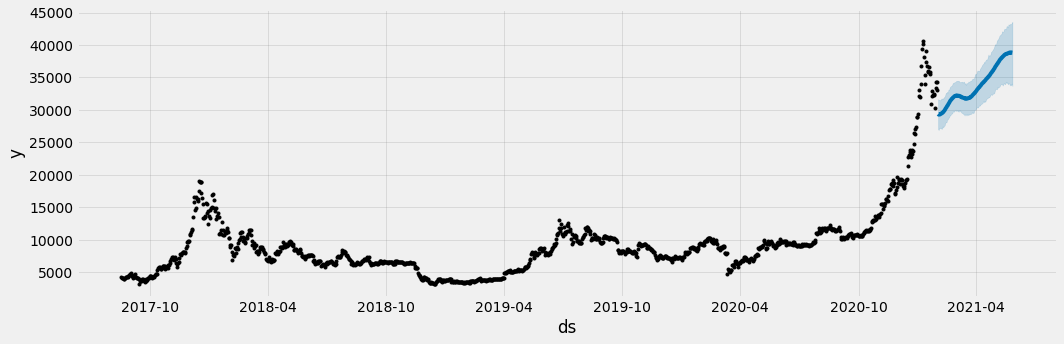

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_test_fcst, ax=ax)

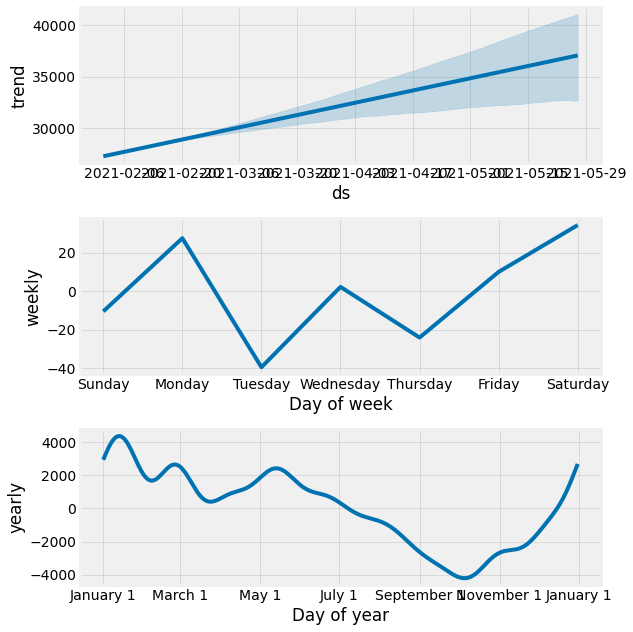

In [ ]:
# Plot the components
fig = model.plot_components(data_test_fcst)

ConversionError: ignored

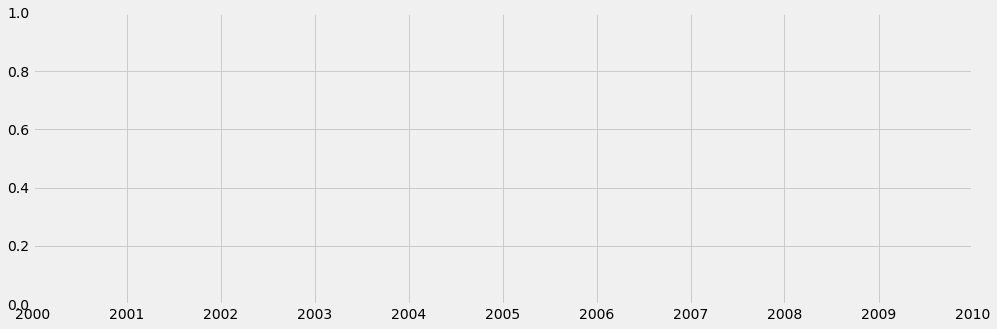

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test, data_test['Test Set'], color='r')
fig = model.plot(data_test_fcst, ax=ax)

In [ ]:
# Instalación
!pip install jupyter-dash
!pip install dash
!pip install dash_core_components
!pip install dash_html_components
!pip install dash_table
!pip install jupyter-dash
!pip install dash_pivottable

     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 1.0MB 38.0MB/s 
     |████████████████████████████████| 3.5MB 36.4MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 1.8MB 34.1MB/s 
     |████████████████████████████████| 358kB 24.3MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85845 sha256=c9d43efa29adb7db5843caa8b9691f7834490b32c9e0f0c25edd260fced48ebf
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014873 sha256=1f0d4fe268fd6ffbe726f0c21798efa6ad63ac97a722e79e78921dcf6feb28fc
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540992 sha256=51ff44a77e74c18991344

In [ ]:
import pandas as pd
import numpy as np

# import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input,Output,State
import dash_table

import plotly.express as px

In [ ]:
test2 = df.groupby(by="date", as_index=False).mean()
test2.head()

,date,subjectivity,polarity
0,2017-01-01,0.085064,0.032313
1,2017-01-02,0.087150,0.025686
2,2017-01-03,0.079158,0.029962
3,2017-01-04,0.088688,0.021112
4,2017-01-05,0.094335,0.016679


In [ ]:
figura_1 = px.scatter(test2, 
              x="date", 
              y="polarity", 
              #color='pop',
              #size='pop',
              #hover_name="country",
              #labels={'lifeExp':'Exp de vida', 'gdpPercap':'Pbi per cápita', 'pop':'Población'},
              title='Polarity')
figura_1.show()

In [ ]:
figura_2 = px.scatter(test2, 
              x="date", 
              y="subjectivity", 
              #color='pop',
              #size='pop',
              #hover_name="country",
              #labels={'lifeExp':'Exp de vida', 'gdpPercap':'Pbi per cápita', 'pop':'Población'},
              title='subjectivity')
figura_2.show()

In [ ]:
figura_3 = px.scatter(test2, 
              x="polarity", 
              y="subjectivity", 
              #color='pop',
              #size='pop',
              #hover_name="country",
              #labels={'lifeExp':'Exp de vida', 'gdpPercap':'Pbi per cápita', 'pop':'Población'},
              title='Polarity vs Subjectivity')
figura_3.show()

In [ ]:
app = JupyterDash() 

# Ahora añadimos un gráfico en el layout:
app.layout = html.Div(children=[
    html.H1('Twitter Sentiment Analysis'),
    html.P('Plots:'),
    dcc.Graph(id='grafico_1', figure=figura_1),
    #html.P('Subjectivity'),
    dcc.Graph(id='grafico_2', figure=figura_2),
    dcc.Graph(id='grafico_3', figure=figura_3)
]) 

if __name__ == '__main__':
    app.run_server(mode='external') 

Dash app running on:


<IPython.core.display.Javascript object>